In [1]:
import torch
# torch.cuda.set_device(0)
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage()   #0-1 转 0-255
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torch.autograd import Variable
#读取MNIST数据集
transform = transforms.Compose([
    transforms.ToTensor(),  # 0-255  转为  0-1
    transforms.Normalize((0.5,),(0.5,))  # 0-1  转为  -1-1
])
trainset=torchvision.datasets.MNIST(
    root='E:/HardDisk/data/',
    train=True,
    download=False,
    transform=transform
)
trainloader=torch.utils.data.DataLoader(
    trainset,
    batch_size=1,
    shuffle=True,
    num_workers=0
)
testset=torchvision.datasets.MNIST(
    root='E:/HardDisk/data/',
    train=False,
    download=False,
    transform=transform
)
testloader=torch.utils.data.DataLoader(
    testset,
    batch_size=1,
    shuffle=False,
    num_workers=0
)

In [2]:
#定义LeNet-5
import torch.nn as nn
import torch.nn.functional as F
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        self.conv1=nn.Conv2d(1,6,5)
        self.conv2=nn.Conv2d(6,16,5)
        self.fc1=nn.Linear(16*4*4,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
        
    def forward(self,x):
        x=F.max_pool2d(F.relu(self.conv1(x)),2)
        x=F.max_pool2d(F.relu(self.conv2(x)),2)
        x=x.view(x.size()[0],-1)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x
net=LeNet()
print(net)
#定义卷积层
conv1=nn.Conv2d(1,6,5)
conv2=nn.Conv2d(6,16,5)
fc1=nn.Linear(16*4*4,120)
fc2=nn.Linear(120,84)
fc3=nn.Linear(84,10)
#定义最大池化层
maxpooling=nn.MaxPool2d(2,2)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


label:tensor([7])


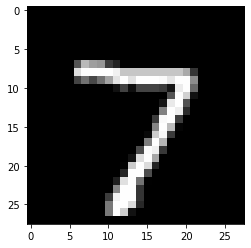

In [3]:
data_iter=iter(testloader)
images, labels = data_iter.next() #一个batch多个图片  输入 1 1 28 28
print("label:"+str(labels))
# img=transforms.ToPILImage(images)
img=images.squeeze(0)
# img=torchvision.utils.make_grid(images).numpy()
plt.imshow(np.transpose(img,(1,2,0)),cmap='gray')
plt.show()

In [4]:
img.shape

torch.Size([1, 28, 28])

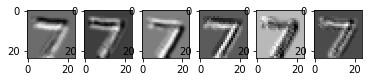

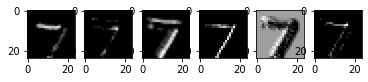

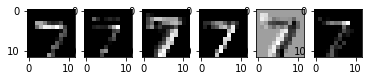

In [5]:
plt.figure()
c1 = Variable(conv1(images))
img_c1= c1.squeeze(0)
for i in  range(img_c1.shape[0]):
    plt.subplot(161+i)
    plt.imshow(img_c1[i,:,:],cmap='gray')
plt.show() 

a1 = F.relu(c1)
img_a1= a1.squeeze(0)
for i in  range(img_a1.shape[0]):
    plt.subplot(161+i)
    plt.imshow(img_a1[i,:,:],cmap='gray')
plt.show() 

s1 = F.max_pool2d(a1,2)
img_s1= s1.squeeze(0)
for i in  range(img_s1.shape[0]):
    plt.subplot(161+i)
    plt.imshow(img_s1[i,:,:],cmap='gray')
plt.show()   

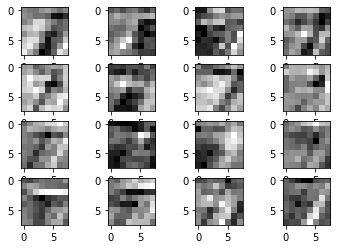

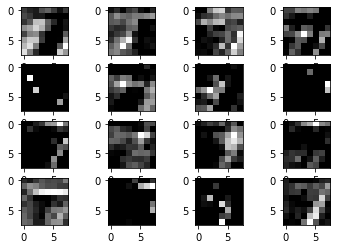

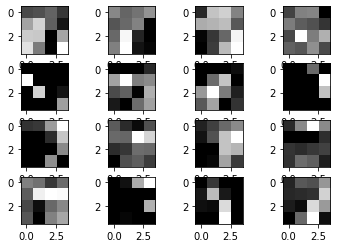

In [6]:
###### plt.figure()
c2 = Variable(conv2(s1))
img_c2= c2.squeeze(0)
for i in  range(img_c2.shape[0]):
    plt.subplot(4,4,1+i)
    plt.imshow(img_c2[i,:,:],cmap='gray')
plt.show() 

a2 = F.relu(c2)
img_a2 = a2.squeeze(0)
for i in  range(img_a2.shape[0]):
    plt.subplot(4,4,1+i)
    plt.imshow(img_a2[i,:,:],cmap='gray')
plt.show() 

s2 = F.max_pool2d(a2,2)
img_s2= s2.squeeze(0)
for i in  range(img_s2.shape[0]):
    plt.subplot(4,4,1+i)
    plt.imshow(img_s2[i,:,:],cmap='gray')
plt.show()   

In [7]:
#进入fc前有个reshape过程
fc1_in = s2.view(s2.size()[0],-1)   #N*C*W*H 变成N*CWH [1, 16, 4, 4]变[1,16*20*20]
fc1_out_temp = fc1(fc1_in)
fc1_out = F.relu(fc1_out_temp)


In [8]:
fc2_in = fc1_out
fc2_out_temp = fc2(fc2_in)
fc2_out = F.relu(fc2_out_temp)

In [9]:
fc3_in = fc2_out
fc3_out = fc3(fc3_in)
fc3_out

tensor([[ 0.0821, -0.0753, -0.0116, -0.0315,  0.0354,  0.0091, -0.0203,  0.0738,
          0.0943, -0.0381]], grad_fn=<AddmmBackward>)